# Intensity Correction

In [1]:
## Requirement Julia 1.1 (maybe >=0.7)
## Installation of packages: uncomment the following lines
# using Pkg
# pkg"add Plots"
# pkg"add https://github.com/korbinian90/MRI.jl"

In [2]:
using Plots
using MRI
##

image = readmag("testData/mprage_cut.nii.gz")
@time corrected = makehomogeneous(image);

 76.238335 seconds (171.33 M allocations: 33.199 GiB, 8.99% gc time)


## Visualization

In [7]:
anim = @animate for iSlice = 70:size(image, 2)

    p1 = plot(getscaledimage(image[:,iSlice,:], :s); title = "RSS Magnitude", aspect_ratio = :equal, axis = nothing)
    p2 = plot(getscaledimage(corrected[:,iSlice,:], :s); title = "Corrected", aspect_ratio = :equal, axis = nothing)

    plot(p1, p2; aspect_ratio = :equal, axis = nothing, size = (800, 400))
end

gif(anim, "animation.gif")

Plots.AnimatedGif("C:\\Users\\korbi\\Dropbox\\fMRI\\julia\\intensity_correction\\animation.gif")

## Steps of the Algorithmn

### Masking and Simple Segmentation

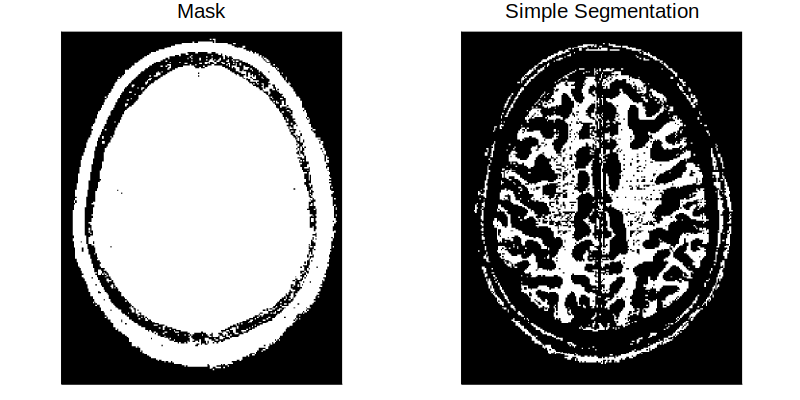

In [4]:
mask = getrobustmask(image)
segmentation = MRI.boxsegment(image, mask)

##
iSlice = 200
p1 = plot(Gray.(mask[:,iSlice,:]); title = "Mask", aspect_ratio = :equal, axis = nothing)
p2 = plot(Gray.(segmentation[:,iSlice,:]); title = "Simple Segmentation", aspect_ratio = :equal, axis = nothing)
plot(p1, p2; aspect_ratio = :equal, axis = nothing, size = (800, 400))

### Smoothing
1. Smoothing/Interpolating the segmented image 
2. Filling the remaining holes
3. Smoothing

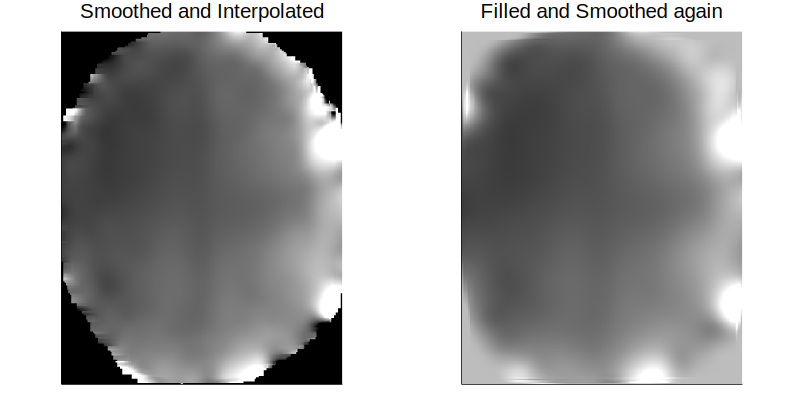

In [5]:
using Statistics

σ = [6, 6, 6]
lowpass = gaussiansmooth3d(image, σ; mask = segmentation)

##
p1 = plot(getscaledimage(lowpass[:,iSlice,:], 2000, 1000, :s); title = "Smoothed and Interpolated", aspect_ratio = :equal, axis = nothing)
##

MRI.fillandsmooth!(lowpass, mean(image[mask]), σ)

##
p2 = plot(getscaledimage(lowpass[:,iSlice,:], 2000, 1000, :s); title = "Filled and Smoothed again", aspect_ratio = :equal, axis = nothing)
plot(p1, p2; aspect_ratio = :equal, axis = nothing, size = (800, 400))

### Dividing the magnitude by the lowpass version

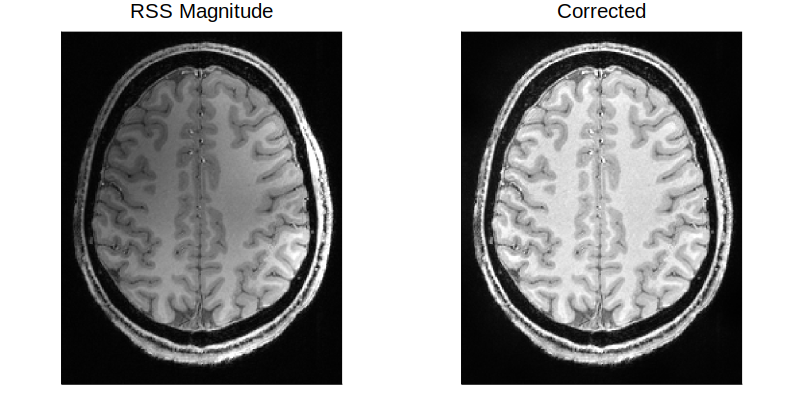

In [6]:
corrected = image ./ lowpass

##
p1 = plot(getscaledimage(image[:,iSlice,:], :s); title = "RSS Magnitude", aspect_ratio = :equal, axis = nothing)
p2 = plot(getscaledimage(corrected[:,iSlice,:], :s); title = "Corrected", aspect_ratio = :equal, axis = nothing)
plot(p1, p2; aspect_ratio = :equal, axis = nothing, size = (800, 400))